In [18]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge


In [2]:
#reading data and exploring columns
data = pd.read_csv("Advertising_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [3]:
#checking the null data
data.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

In [4]:
#correlations between product_sold and other columns
corr = data.corr()
corr["Product_Sold"].sort_values(ascending=False)

Product_Sold            1.000000
Affiliate_Marketing     0.611603
Billboards              0.480593
Social_Media            0.401088
TV                      0.374228
Google_Ads              0.203678
Influencer_Marketing    0.140844
Name: Product_Sold, dtype: float64

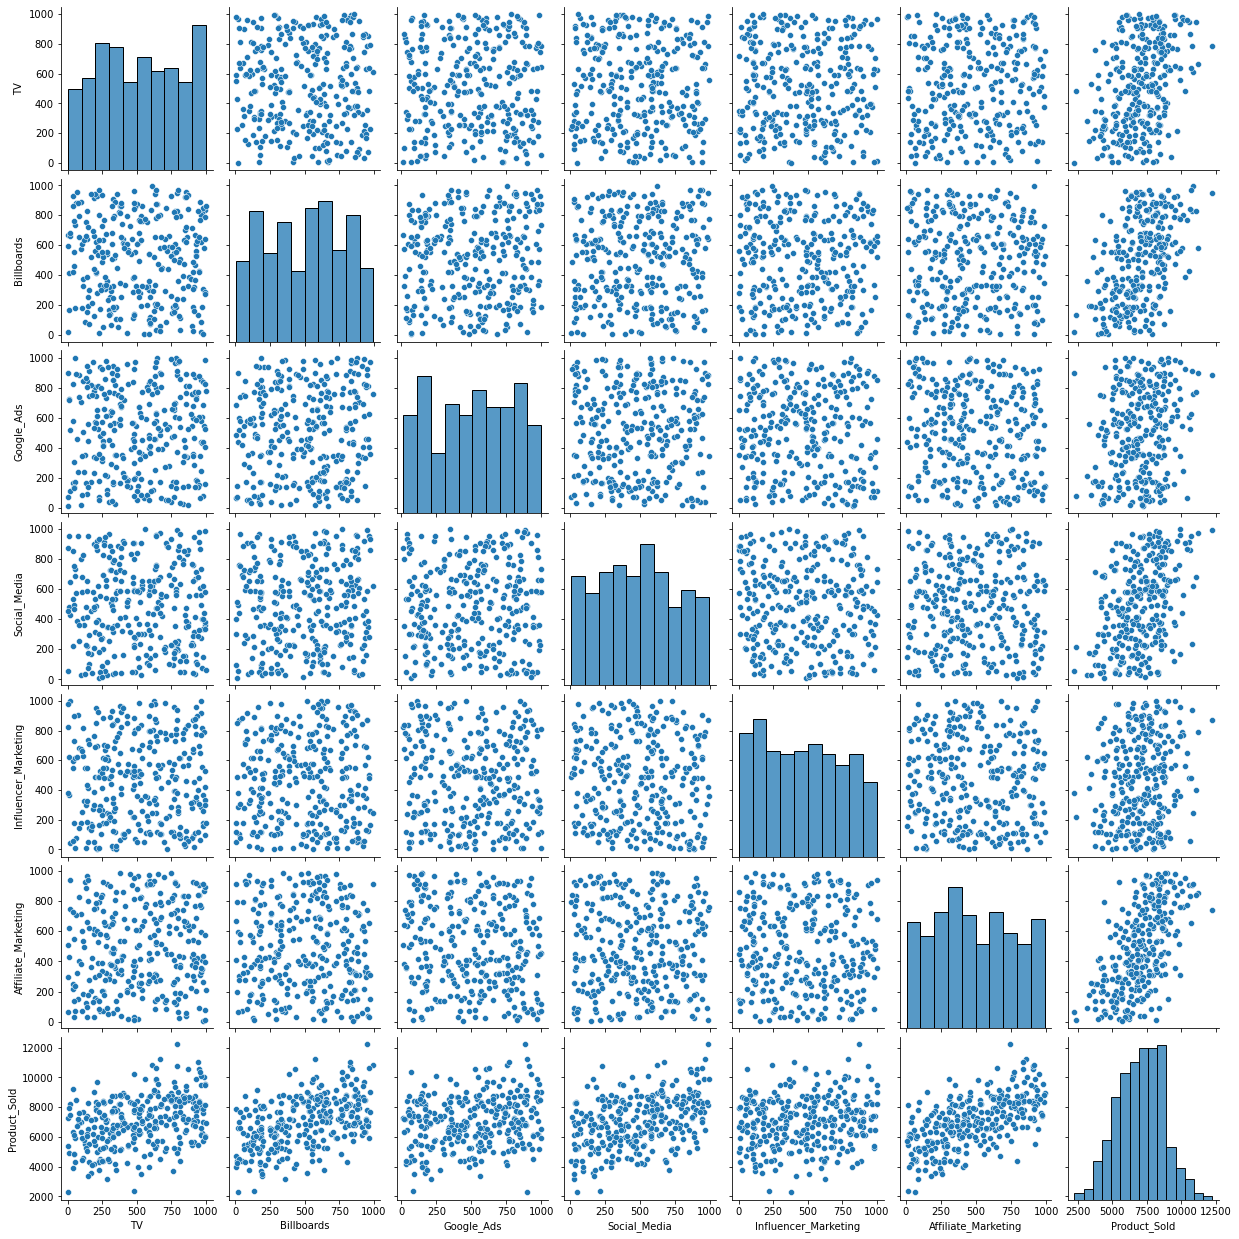

In [5]:
#visulation of data
sns.pairplot(data)
plt.show()

In [6]:
#choosing the variables
X = data[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
y = data['Product_Sold']

In [7]:
#separating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9999736866138691


In [9]:
#predicting
pred = model.predict(X_test)

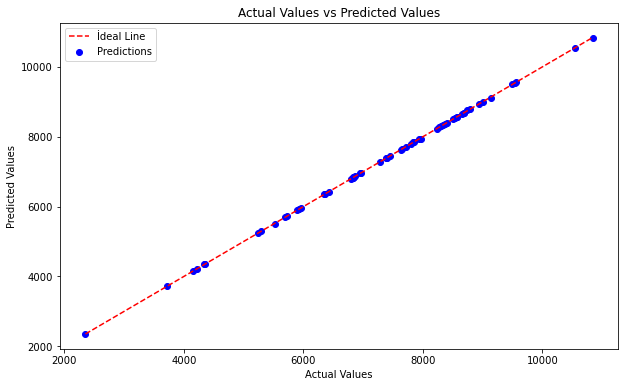

In [10]:
#graph of actual vs predicted values
actual_values = y_test
predicted_values = pred

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Predictions')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', linestyle='--', label='İdeal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.legend()
plt.show()

In [17]:
crossval = cross_val_score(model,X,y,cv=5, scoring="r2")
crossvalscore = {
    "5-Katlı Çapraz Doğrulama R² Skorları": crossval,
    "Ortalama R² Skoru": np.mean(crossval),
    "Standart Sapma R² Skoru": np.std(crossval)
}
crossvalscore

{'5-Katlı Çapraz Doğrulama R² Skorları': array([0.99994857, 0.99997121, 0.99995535, 0.99994838, 0.99997497]),
 'Ortalama R² Skoru': 0.9999596955535814,
 'Standart Sapma R² Skoru': 1.1284621685183855e-05}

In [19]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


r2_score_test = model.score(X_test, y_test)
print(f'Test R² Skoru: {r2_score_test}')

Test R² Skoru: 0.9999736864632335
